PART B

A dataset comprising data on an e-commerce company's clients is provided to you. The
columns in the dataset are as follows:
Customer ID: Unique identifier for each customer
Age: The age of the customer
Gender: The gender of the customer
Annual Income (k$): Annual income of the customer in thousands of dollars
Spending Score (1-100): A rating is given by the company based on consumer spending
patterns and behavior


Your task is to perform the following analysis using Python:

● Load the dataset into a Pandas DataFrame.

● Investigate the distribution of the data, the relationships between variables, and any
missing values or outliers by using exploratory data analysis (EDA).

● Perform clustering analysis to segment customers into different groups based on their
Annual Income and Spending Score. Use the elbow method to identify the optimal
number of clusters.

● Visualize the clustering analysis results using a scatter plot, with each cluster having a
different colour.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (200, 5)


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
count_bygender=df['Gender'].value_counts().to_frame(name='count').sort_values(by=['count'])
count_bygender

,count
Male,88
Female,112


<Axes: xlabel='Gender', ylabel='count'>

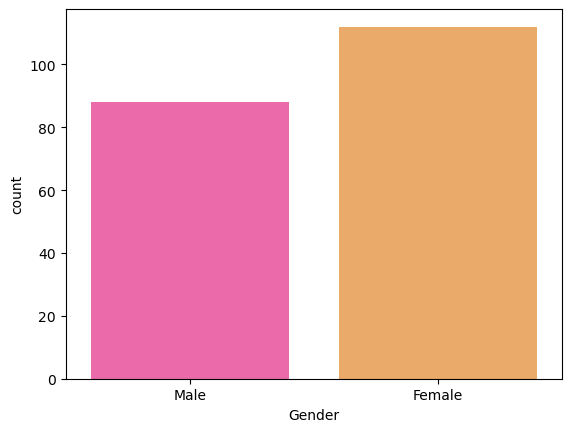

In [7]:
sns.countplot(x='Gender',data=df,palette='spring')

In [8]:
print('min age in the dataset :',df['Age'].min())
print('max age in the dataset :',df['Age'].max())

min age in the dataset : 18
max age in the dataset : 70


<Figure size 2000x1800 with 0 Axes>

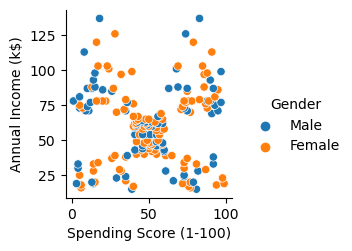

In [9]:
plt.figure(figsize=(20,18))
sns.pairplot(df,x_vars=['Spending Score (1-100)'],y_vars=['Annual Income (k$)'],hue='Gender')

In [11]:
#Making use of ProfileReport to understand the dataset in a general report format
#It generates a complete report consisting of 
#Dataset Overview
#Correlation between the attributes
#Missing Values Stats ..etc

from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
model = KMeans(n_clusters=5,init='k-means++',random_state=30)

In [18]:
#fitting the data in 5 clusters ranging from 0 to 4
model.fit_predict(x)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [20]:
x['cluster_number']=km.fit_predict(x)
x.head()

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


<Axes: xlabel='cluster_number', ylabel='Spending Score (1-100)'>

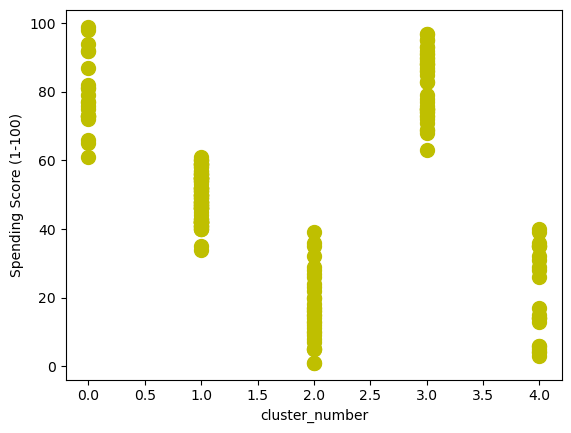

In [24]:
x.plot.scatter(x = 'cluster_number',y='Spending Score (1-100)', s = 100,c='y')

<Axes: xlabel='cluster_number', ylabel='Annual Income (k$)'>

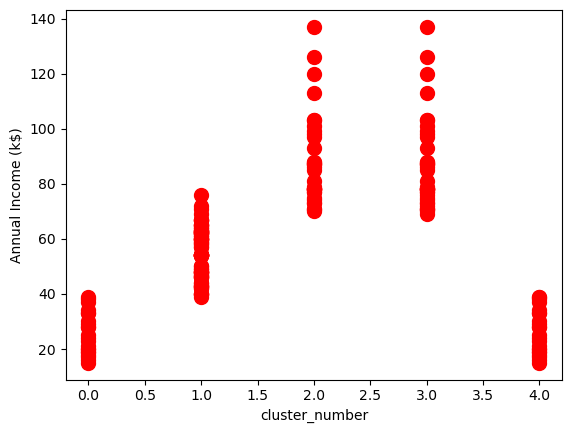

In [25]:
x.plot.scatter(y = 'Annual Income (k$)',x='cluster_number', s = 100,c='r')